In [49]:
import numpy as np
import pandas as pd
import numpy as np
import glob as gb
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle



In [50]:
train_df = pd.read_csv('archive/train.csv',sep=" ",header=None)
train_df.columns=['patient id', 'filename', 'label','data source']
train_df=train_df.drop(['patient id', 'data source'], axis=1 )
train_df.head()

,filename,label
0,ARDSSevere.png,negative
1,acute-respiratory-distress-syndrome-ards-1.jpg,negative
2,acute-respiratory-distress-syndrome-ards.jpg,negative
3,ards-secondary-to-tiger-snake-bite.png,negative
4,pneumocystis-pneumonia-2-PA.png,negative


In [51]:
test_df = pd.read_csv('archive/test.csv',sep=" ",header=None)
test_df.columns=['patient id', 'filename', 'label','data source']
test_df=test_df.drop(['patient id', 'data source'], axis=1 )
test_df.head()

,filename,label
0,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive
1,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive
2,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive
3,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive
4,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive


In [52]:
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())
train_df = shuffle(train_df)


positive    15994
negative    13992
Name: label, dtype: int64
positive    200
negative    200
Name: label, dtype: int64


In [53]:
train_folder_path = 'archive/train'
test_folder_path = 'archive/test'



def count_photos(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            count +=1
    return count


def count_photos_in_folders(train_folder_path, test_folder_path):
    train_count = count_photos(train_folder_path)
    test_count = count_photos(test_folder_path)
    return (train_count, test_count)

# 将数据信息打印出来
# 2. Print out info for each dataset
train_count, test_count = count_photos_in_folders(train_folder_path, test_folder_path)

print(f"Train folder contains {train_count} photos.")
print(f"Test folder contains {test_count} photos.")





Train folder contains 29984 photos.
Test folder contains 400 photos.


In [54]:
#Let's see how many images for training and validation and testing
train_df, valid_df = train_test_split(train_df, train_size=0.8, random_state=0)

print(f"Negative and positive values of train:\n {train_df['label'].value_counts()}")
print(f"Negative and positive values of validation:\n {valid_df['label'].value_counts()}")
print(f"Negative and positive values of test:\n {test_df['label'].value_counts()}")

Negative and positive values of train:
 positive    12728
negative    11260
Name: label, dtype: int64
Negative and positive values of validation:
 positive    3266
negative    2732
Name: label, dtype: int64
Negative and positive values of test:
 positive    200
negative    200
Name: label, dtype: int64


Found 23988 validated image filenames belonging to 2 classes.
Found 5998 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
A403529-01-08-1901-NA-CHEST_AP_PORT-18183-1.000000-AP-28557-1-1.jpg 1.0


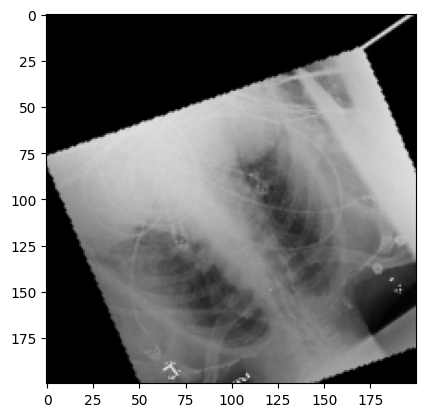

In [55]:


train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

#Now fit the them to get the images from directory (name of the images are given in dataframe) with augmentation


train_gen = train_datagen.flow_from_dataframe(dataframe = train_df, directory='archive/train', x_col='filename', 
                                              y_col='label', target_size=(200,200), batch_size=64, 
                                               class_mode='binary')
valid_gen = test_datagen.flow_from_dataframe(dataframe = valid_df, directory='archive/train', x_col='filename',
                                             y_col='label', target_size=(200,200), batch_size=64, 
                                            class_mode='binary')
test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory='archive/test', x_col='filename', 
                                            y_col='label', target_size=(200,200), batch_size=64,
                                             class_mode='binary')

#class mode binary because we want the classifier to predict covid or not
#target size (200,200) means we want the images to resized to 200*200

#Examine the first image in the training dataset and print the label which corresponding to it.
images, labels = next(train_gen)
# Get the filenames associated with the images in the batch
filenames = train_gen.filenames
# Print the filename and label for the first image in the batch
print(filenames[0], labels[0])
# Plot the first image in the batch
plt.imshow(images[0])